In [59]:
from qiskit import *
import numpy as np
import math
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

N = 15
a = 13

math.gcd(a, N)

1

In [60]:
def axmodN(a, x, n, N):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    qc = QuantumCircuit(n)
    for j in range(x):
        if a in [2,13]:
            qc.swap(2, 3)
            qc.swap(1, 2)
            qc.swap(0, 1)
        if a in [7,8]:
            qc.swap(0, 1)
            qc.swap(1, 2)
            qc.swap(2, 3)
        if a in [11]:
            qc.swap(0, 2)
            qc.swap(1, 3)
        if a in [7,11,13]:
            for k in range(n):
                qc.x(k)
    qc = qc.to_gate()
    qc.name = "%i^%i mod %i" % (a, x, N)
    qc = qc.control(1)
    return qc

def QFTdagger(n):
    qc = QuantumCircuit(n)
    # Swap the qubits
    for i in range(n//2):
        qc.swap(i, n-i-1)
    # Operation
    for i in range(n):
        for j in range(i):
            qc.cu1(-np.pi/(2**(i-j)), j, i) 
        qc.h(i)
    qc.name = "QFTdagger"
    return qc
        

In [61]:
n = 4 # number of qubits needed to represent number that will be done prime factorization
qr = QuantumRegister(2*n) # Prepare 2*n quantum registers as |x>|w> = |x3 x2 x1 x0>|w3 w2 w1 w0>
cr = ClassicalRegister(2*n)
qc = QuantumCircuit(qr, cr)
# Hadamard gates
for i in range(n):
    qc.h(qr[i])

# |w> -> |1>
qc.x(qr[n])

# Implement U_f (f(x) = a^x (mod N))  U_f|x>|w> = |x>|w+f(x)> ("+" represents "XOR")
for i in range(n):
    qc.append(axmodN(a, 2**i, n, N), [i]+[n+i for i in range(n)])
qc.barrier()

# Implement QFTdagger
qc.append(QFTdagger(n), range(n))
qc.barrier()

# Measure
qc.measure(range(n), range(n))

# Show quantum circuit
qc.draw(initial_state=True)  

┌───┐                                                »
q131_0: |0>┤ H ├───────■────────────────────────────────────────»
           ├───┤       │                                        »
q131_1: |0>┤ H ├───────┼───────────────■────────────────────────»
           ├───┤       │               │                        »
q131_2: |0>┤ H ├───────┼───────────────┼───────────────■────────»
           ├───┤       │               │               │        »
q131_3: |0>┤ H ├───────┼───────────────┼───────────────┼────────»
           ├───┤┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐»
q131_4: |0>┤ X ├┤0             ├┤0             ├┤0             ├»
           └───┘│              ││              ││              │»
q131_5: |0>─────┤1             ├┤1             ├┤1             ├»
                │  13^1 mod 15 ││  13^2 mod 15 ││  13^4 mod 15 │»
q131_6: |0>─────┤2             ├┤2             ├┤2             ├»
                │              ││              ││              │»
q131_7: |0>─────┤3             ├┤3             ├┤3             ├»
                └──────────────┘└──────────────┘└──────────────┘»
  c27_0: 0 ═════════════════════════════════════════════════════»
                                                                »
  c27_1: 0 ═════════════════════════════════════════════════════»
                                                                »
  c27_2: 0 ═════════════════════════════════════════════════════»
                                                                »
  c27_3: 0 ═════════════════════════════════════════════════════»
                                                                »
  c27_4: 0 ═════════════════════════════════════════════════════»
                                                                »
  c27_5: 0 ═════════════════════════════════════════════════════»
                                                                »
  c27_6: 0 ═════════════════════════════════════════════════════»
                                                                »
  c27_7: 0 ═════════════════════════════════════════════════════»
                                                                »
«                         ░ ┌────────────┐ ░ ┌─┐         
«q131_0: ─────────────────░─┤0           ├─░─┤M├─────────
«                         ░ │            │ ░ └╥┘┌─┐      
«q131_1: ─────────────────░─┤1           ├─░──╫─┤M├──────
«                         ░ │  QFTdagger │ ░  ║ └╥┘┌─┐   
«q131_2: ─────────────────░─┤2           ├─░──╫──╫─┤M├───
«                         ░ │            │ ░  ║  ║ └╥┘┌─┐
«q131_3: ───────■─────────░─┤3           ├─░──╫──╫──╫─┤M├
«        ┌──────┴───────┐ ░ └────────────┘ ░  ║  ║  ║ └╥┘
«q131_4: ┤0             ├─░────────────────░──╫──╫──╫──╫─
«        │              │ ░                ░  ║  ║  ║  ║ 
«q131_5: ┤1             ├─░────────────────░──╫──╫──╫──╫─
«        │  13^8 mod 15 │ ░                ░  ║  ║  ║  ║ 
«q131_6: ┤2             ├─░────────────────░──╫──╫──╫──╫─
«        │              │ ░                ░  ║  ║  ║  ║ 
«q131_7: ┤3             ├─░────────────────░──╫──╫──╫──╫─
«        └──────────────┘ ░                ░  ║  ║  ║  ║ 
« c27_0: ═════════════════════════════════════╩══╬══╬══╬═
«                                                ║  ║  ║ 
« c27_1: ════════════════════════════════════════╩══╬══╬═
«                                                   ║  ║ 
« c27_2: ═══════════════════════════════════════════╩══╬═
«                                                      ║ 
« c27_3: ══════════════════════════════════════════════╩═
«                                                        
« c27_4: ════════════════════════════════════════════════
«                                                        
« c27_5: ════════════════════════════════════════════════
«                                                        
« c27_6: ════════════════════════════════════════════════
«                                                        
« c27_7: ══════════════════════════

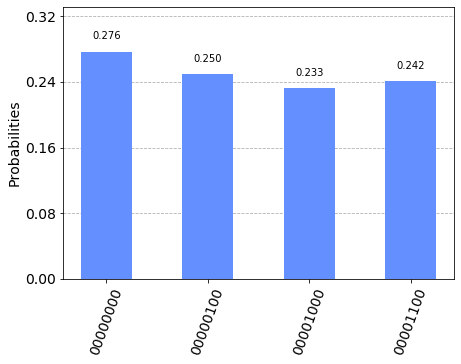

In [62]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots=2048).result()
plot_histogram(result.get_counts())